## **Recognizing handwritten digits using Convolutional Neural Networks** 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import keras
from keras.utils import np_utils
from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
from keras.datasets import mnist
(X_train,Y_train), (X_test,Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 5s 0us/step


In [3]:
 print(X_train[0])
 print(Y_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [4]:
print(X_train.shape,Y_train.shape) 
print(X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


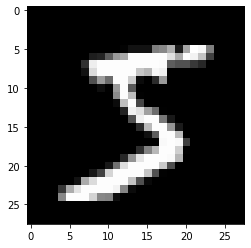

In [6]:
plt.imshow(X_train[0],cmap='gray')
plt.show()

In [0]:
X_train = X_train.astype('float32')/255 #Normalization
X_test = X_test.astype('float32')/255

In [8]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [0]:
X_train = X_train.reshape(-1,28,28,1) #The input to a Conv2D layer must be four-dimensional.
X_test = X_test.reshape(-1,28,28,1)

In [10]:
print(X_train.shape,X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [0]:
Y_train=np_utils.to_categorical(Y_train) #convert array of labeled data(from 0 to nb_classes-1) to one-hot vector.
Y_test=np_utils.to_categorical(Y_test)

In [12]:
Y_train[0] #One-hot encoding

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
print(Y_train.shape,Y_test.shape)

(60000, 10) (10000, 10)


These deep learning concepts may be a little hard to understand immediately. Do consider visiting my github where i have put up more information about this. 

In [14]:
model=Sequential()
model.add(Conv2D(64,activation='relu',kernel_size=3,input_shape=(28,28,1),padding='same')) #input_shape does not include batch_size
model.add(Conv2D(64,activation='relu',kernel_size=3,padding='same'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16,activation='relu',kernel_size=3,padding='same'))
model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 16)        9232      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3136)              0         


In [15]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy']) #Sparse Categorical Crossentropy may also be used.

In [16]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),nb_epoch=5,batch_size=48,verbose=2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.





Train on 60000 samples, validate on 10000 samples
Epoch 1/5





 - 23s - loss: 0.1686 - acc: 0.9478 - val_loss: 0.0480 - val_acc: 0.9842
Epoch 2/5
 - 8s - loss: 0.0550 - acc: 0.9835 - val_loss: 0.0333 - val_acc: 0.9894
Epoch 3/5
 - 8s - loss: 0.0402 - acc: 0.9877 - val_loss: 0.0383 - val_acc: 0.9879
Epoch 4/5
 - 8s - loss: 0.0339 - acc: 0.9895 - val_loss: 0.0267 - val_acc: 0.9911
Epoch 5/5
 - 8s - loss: 0.0291 - acc: 0.9904 - val_loss: 0.0282 - val_acc: 0.9910


In [0]:
test_data = X_test[:10]

2


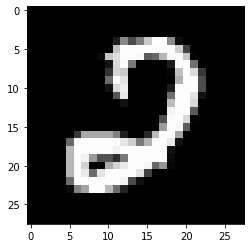

In [18]:
image_index = 400
plt.imshow(X_test[image_index].reshape(28,28),cmap='gray')
pred = model.predict(X_test[image_index].reshape(1,28,28,1))
print(pred.argmax())

### References:-

[Convolution layers - Machine Learning Mastery](https://machinelearningmastery.com/convolutional-layers-for-deep-learning-neural-networks/)

[Keras docs](https://keras.io/)